11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8955 - loss: 0.3552 - val_accuracy: 0.9690 - val_loss: 0.1040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9721 - loss: 0.0873 - val_accuracy: 0.9760 - val_loss: 0.0794
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9756 - val_loss: 0.0769
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9876 - loss: 0.0386 - val_accuracy: 0.9756 - val_loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9781 - val_loss: 0.0751
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.9766 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9790 - val_loss: 0.0835
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0

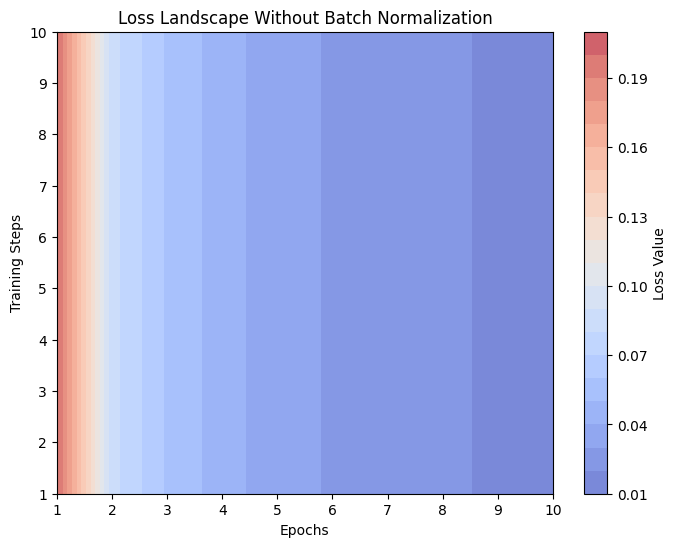

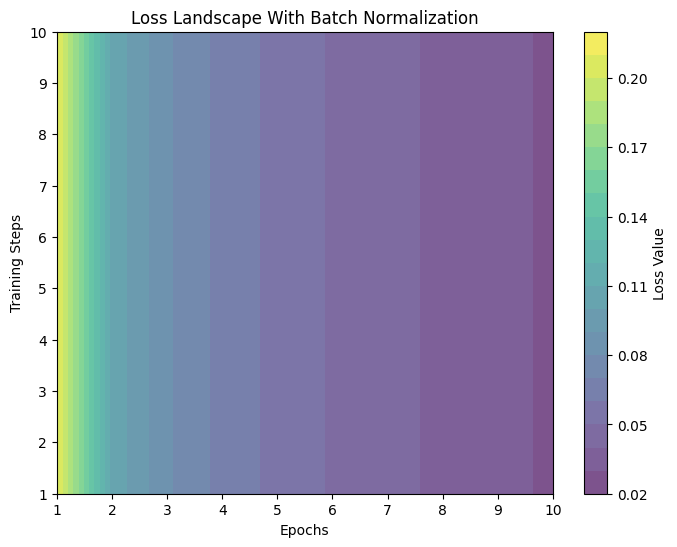

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (e.g., MNIST for simplicity)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Flatten images for dense layers
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Define model without Batch Normalization
def build_model_without_bn():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(784,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Define model with Batch Normalization
def build_model_with_bn():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(784,)),
        BatchNormalization(),  # BN Layer
        Dense(128, activation='relu'),
        BatchNormalization(),  # BN Layer
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train models
def train_model(model):
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)
    return history

# Train both models
model_without_bn = build_model_without_bn()
history_without_bn = train_model(model_without_bn)

model_with_bn = build_model_with_bn()
history_with_bn = train_model(model_with_bn)

# Extract loss values
loss_without_bn = history_without_bn.history['loss']
loss_with_bn = history_with_bn.history['loss']

# Create Contour Plot for Loss Landscape
plt.figure(figsize=(8, 6))
epochs = np.arange(1, 11)
X, Y = np.meshgrid(epochs, epochs)
Z1 = np.array([loss_without_bn for _ in range(len(epochs))])
Z2 = np.array([loss_with_bn for _ in range(len(epochs))])

# Plot loss landscape for model without Batch Normalization
plt.contourf(X, Y, Z1, levels=20, cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Training Steps")
plt.title("Loss Landscape Without Batch Normalization")

plt.figure(figsize=(8, 6))
# Plot loss landscape for model with Batch Normalization
plt.contourf(X, Y, Z2, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(label="Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Training Steps")
plt.title("Loss Landscape With Batch Normalization")

plt.show()
